# vaders model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv('dataset\Reviews.csv')
print(df.shape)
df = df.head(1000)
print(df.shape)


(568454, 10)
(1000, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Score']

0      5
1      1
2      4
3      2
4      5
      ..
995    5
996    5
997    5
998    1
999    2
Name: Score, Length: 1000, dtype: int64

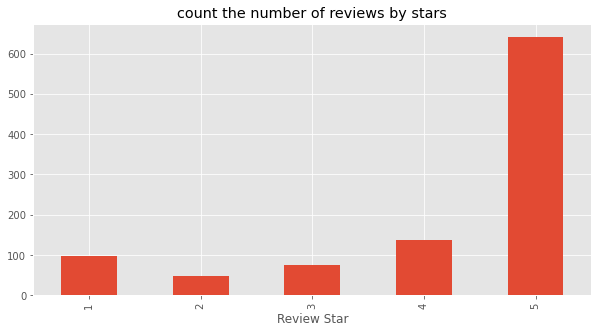

In [5]:
# Quick EDA
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
      title='count the number of reviews by stars',
      figsize=(10,5))
ax.set_xlabel('Review Star')
plt.show()

In [6]:
example = df['Text'][0]
print(example)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [7]:
tokens = nltk.word_tokenize(example)
print(tokens[:10])

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food']


In [8]:
tagged = nltk.pos_tag(tokens)
print(tagged[:10])

[('I', 'PRP'), ('have', 'VBP'), ('bought', 'VBN'), ('several', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('Vitality', 'NNP'), ('canned', 'VBD'), ('dog', 'RP'), ('food', 'NN')]


In [9]:
entites = nltk.chunk.ne_chunk(tagged)
entites.pprint()

(S
  I/PRP
  have/VBP
  bought/VBN
  several/JJ
  of/IN
  the/DT
  (ORGANIZATION Vitality/NNP)
  canned/VBD
  dog/RP
  food/NN
  products/NNS
  and/CC
  have/VBP
  found/VBN
  them/PRP
  all/DT
  to/TO
  be/VB
  of/IN
  good/JJ
  quality/NN
  ./.
  The/DT
  product/NN
  looks/VBZ
  more/RBR
  like/IN
  a/DT
  stew/NN
  than/IN
  a/DT
  processed/JJ
  meat/NN
  and/CC
  it/PRP
  smells/VBZ
  better/RBR
  ./.
  My/PRP$
  (ORGANIZATION Labrador/NNP)
  is/VBZ
  finicky/JJ
  and/CC
  she/PRP
  appreciates/VBZ
  this/DT
  product/NN
  better/JJR
  than/IN
  most/JJS
  ./.)


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [11]:
sia.polarity_scores('I am so good')

{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4927}

In [12]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

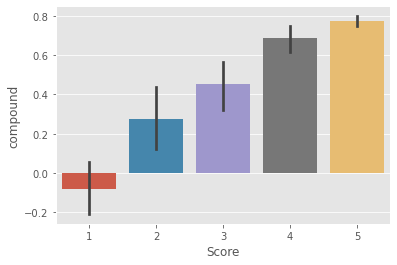

In [14]:
ax = sns.barplot(data= vaders, x='Score', y='compound')
plt.show()

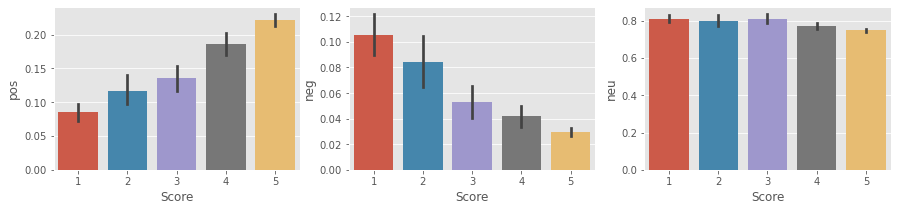

In [15]:
fig, axs = plt.subplots(1,3, figsize=(15,3))
sns.barplot(data= vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data= vaders, x='Score', y='neg', ax=axs[1])
sns.barplot(data= vaders, x='Score', y='neu', ax=axs[2])

plt.show()